# Cleaning of Dataset

### Read Data

In [1]:
data_london_weekday <- read.csv('data/london_weekdays.csv')

In [10]:
subset(data_london_weekday)

X,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,570.0981,Entire home/apt,False,False,2,False,0,0,10,98,1,5.301018,1.5889904,209.6326,14.57179,467.5975,8.372724,-0.16032,51.46531
1,297.9844,Private room,False,True,2,True,1,0,10,99,1,2.198946,0.3792620,553.8917,38.50163,961.4721,17.215961,-0.09683,51.50343
2,336.7906,Private room,False,True,2,False,1,0,10,96,1,2.322958,0.4531776,428.2878,29.77076,959.0428,17.172462,-0.10554,51.52407
3,226.7222,Private room,False,True,2,True,1,0,10,99,1,5.707825,1.7239771,195.6947,13.60296,452.2325,8.097600,-0.16575,51.46292
4,256.3560,Private room,False,True,3,False,0,0,9,98,1,3.257945,0.8254172,329.4771,22.90232,735.3273,13.166649,-0.12055,51.53728
5,239.8928,Private room,False,True,2,False,0,0,10,100,1,5.085730,1.8062181,226.7250,15.75990,486.7371,8.715433,-0.17241,51.47222
6,324.0904,Private room,False,True,2,False,0,0,10,100,1,4.595055,0.2968787,283.4426,19.70241,682.1867,12.215122,-0.19359,51.51061
7,155.6951,Private room,False,True,2,False,1,0,10,95,1,5.102453,1.0137061,214.2640,14.89373,453.6681,8.123306,-0.15177,51.46504
8,129.3539,Private room,False,True,4,False,1,0,9,93,1,4.534041,1.7728061,257.4450,17.89529,541.2170,9.690942,-0.16972,51.47724
9,246.0077,Entire home/apt,False,False,3,False,0,1,8,74,0,3.746655,0.4175545,332.0449,23.08081,761.6523,13.638020,-0.18085,51.51343


### Visualise Data
Note that data seems skewed, hence apply log transformation

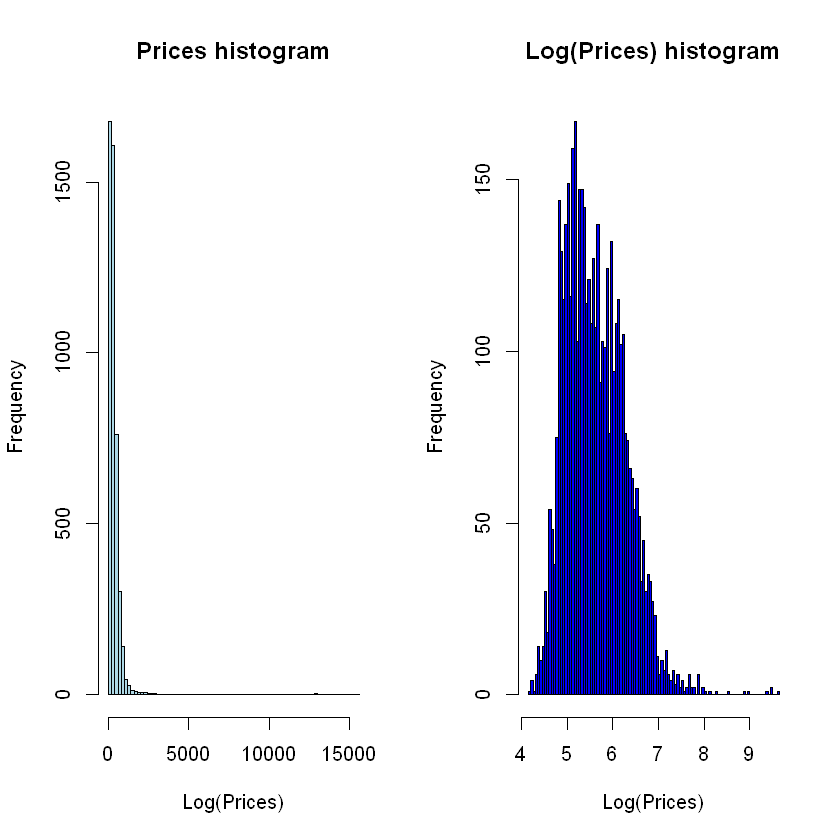

In [2]:
par(mfrow=c(1,2))

#Without log transform
price_weekday <- data_london_weekday$realSum
hist(price_weekday, col = "lightblue"
, xlab = "Log(Prices)"
, main = 'Prices histogram',breaks=100)

#With log transform
price_weekend <- log(data_london_weekday$realSum)
hist(price_weekend, col = "blue"
, xlab = "Log(Prices)"
, main = 'Log(Prices) histogram',breaks=100)

### Remove Outliers
Note that even after log transformation is applied, some outliers exist. Hence, remove outliers that that are outside the 1.5*IQR range

#### Function to find lower and upper quartiles to remove outliers

In [3]:
outlierData <- function(data){
    quartiles <- quantile(data, probs=c(.25, .75), na.rm = FALSE)    
    IQR <- IQR(data)
    Lower <- quartiles[1] - 1.5*IQR
    Upper <- quartiles[2] + 1.5*IQR 
    output <- list(Lower, Upper)
    return (output)}

In [4]:
#Get lower and upper quartile of price data
lowerUpperRange <- outlierData(log(data_london_weekday$realSum))
lowerUpperRange

[[1]]
     25% 
3.687202 

[[2]]
     75% 
7.509895

In [5]:
#Remove outliers from dataset
data_london_weekday_cleaned <- subset(data_london_weekday, 
                                      log(realSum) > lowerUpperRange[1] &
                                       log(realSum) < lowerUpperRange[2])

### Plot before and after removal of outliers

#### Histogram

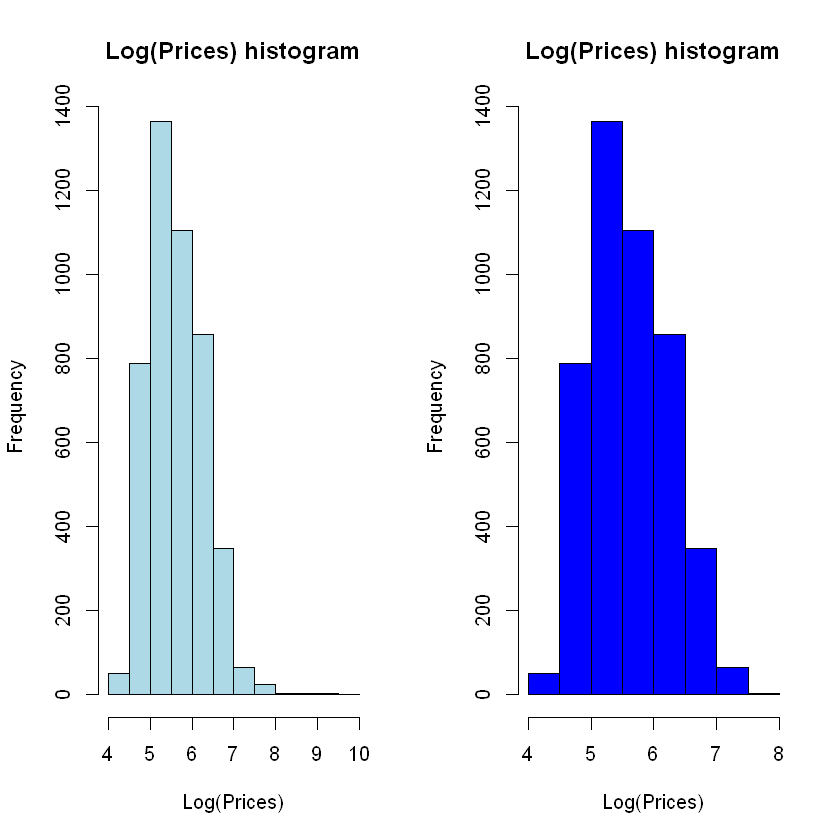

In [6]:
par(mfrow=c(1,2))
#With log transform 
price_weekday <- log(data_london_weekday$realSum)
hist(price_weekday, col = "lightblue"
, xlab = "Log(Prices)"
, main = 'Log(Prices) histogram',breaks=10)

#With log transform + remove outliers
price_weekend <- log(data_london_weekday_cleaned$realSum)
hist(price_weekend, col = "blue"
, xlab = "Log(Prices)"
, main = 'Log(Prices) histogram',breaks=10)

#### Boxplot

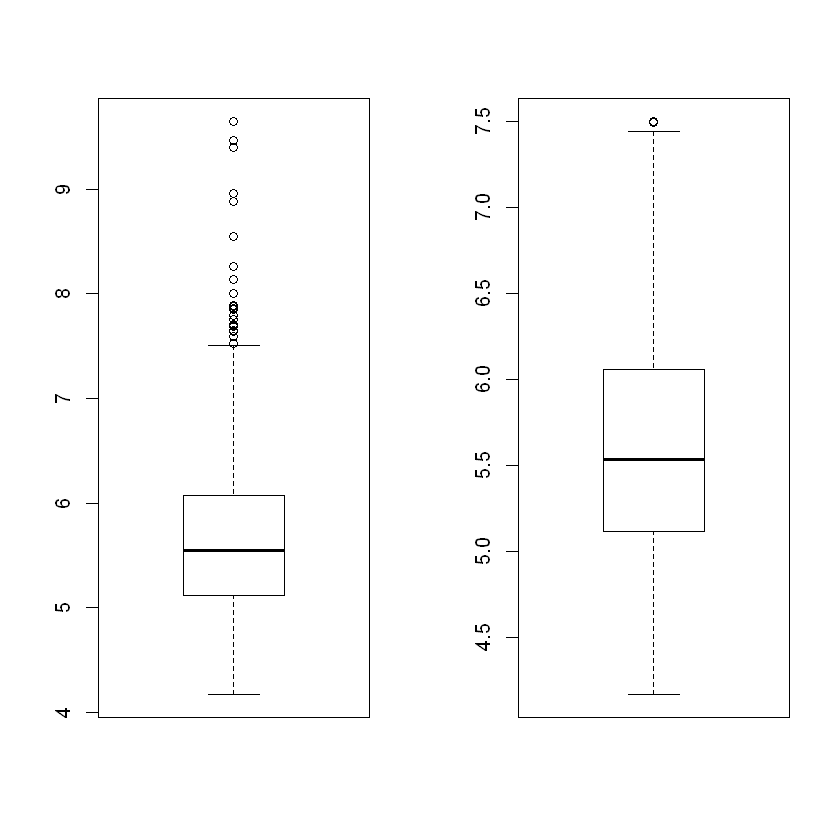

In [7]:
par(mfrow=c(1,2))
boxplot(log(data_london_weekday$realSum))
boxplot(log(data_london_weekday_cleaned$realSum))

### Write cleaned data to csv file

In [8]:
write.csv(data_london_weekday_cleaned, 'london_weekday_cleaned.csv', row.names=FALSE)